In [1]:
! pip install keras

In [2]:
! pip install tensorflow==2.2

(50000, 28, 28) (50000,)


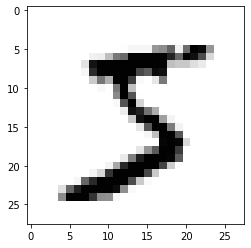

In [3]:
import keras
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

%matplotlib inline

def load_dataset(flatten=False):
    (X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
    # normalize x
    X_train = X_train.astype(float) / 255.
    X_test = X_test.astype(float) / 255.
    
    # Оставим 10000 примеров на валидацию
    X_train, X_val = X_train[:-10000], X_train[-10000:]
    y_train, y_val = y_train[:-10000], y_train[-10000:]
    if flatten:
        X_train = X_train.reshape([X_train.shape[0], -1])
        X_val = X_val.reshape([X_val.shape[0], -1])
        X_test = X_test.reshape([X_test.shape[0], -1])
    return X_train, y_train, X_val, y_val, X_test, y_test


X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
## Размеры
print(X_train.shape, y_train.shape)
## Нарисуем пример
plt.imshow(X_train[0], cmap="Greys");

In [4]:
## Сделаем объекты плоскими N*28*28 to  N*784

X_train = X_train.reshape((X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1]*X_test.shape[2]))

print('Train dimension:');print(X_train.shape)
print('Test dimension:');print(X_test.shape)

## Лейблы нужно сделать One-Hot
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)
print('Train labels dimension:');print(y_train.shape)
print('Test labels dimension:');print(y_test.shape)

Train dimension:
(50000, 784)
Test dimension:
(10000, 784)
Train labels dimension:
(50000, 10)
Test labels dimension:
(10000, 10)


In [5]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(14, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(loss='mean_squared_error', optimizer='SGD', 
              metrics=['mean_squared_error'])

model.fit(X_train, y_train, epochs=5, batch_size=10, 
          validation_data=(X_test, y_test))

test_loss, test_mse = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss}, test mse: {test_mse}')

Epoch 1/5
5000/5000 [==============================] - 4s 896us/step - loss: 0.0888 - mean_squared_error: 0.0888 - val_loss: 0.0863 - val_mean_squared_error: 0.0863
Epoch 2/5
5000/5000 [==============================] - 4s 845us/step - loss: 0.0827 - mean_squared_error: 0.0827 - val_loss: 0.0792 - val_mean_squared_error: 0.0792
Epoch 3/5
5000/5000 [==============================] - 5s 927us/step - loss: 0.0752 - mean_squared_error: 0.0752 - val_loss: 0.0703 - val_mean_squared_error: 0.0703
Epoch 4/5
5000/5000 [==============================] - 4s 824us/step - loss: 0.0641 - mean_squared_error: 0.0641 - val_loss: 0.0572 - val_mean_squared_error: 0.0572
Epoch 5/5
313/313 [==============================] - 0s 726us/step - loss: 0.0489 - mean_squared_error: 0.0489
Test loss: 0.0489218644797802, test mse: 0.0489218644797802


# Задание
1. Выбрать верный loss
2. Добавить accuracy как оценку качества
3. Исследовать изменение качества при
        3.1. Изменении числа слоев
        3.2. Изменении числа нейронов
        3.3. Изменение функции активации
3. Исследовать параметры SGD, сделать выводы

```
tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum=0.0, nesterov=False, name="SGD", **kwargs
)
```

# Выбираем функцию потерь: бинарная кросс-валидация

In [6]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='sgd',
                loss='binary_crossentropy',
                metrics = ['mean_squared_error'])

model.fit(X_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
391/391 [==============================] - 1s 3ms/step - loss: 0.3000 - mean_squared_error: 0.0847
Epoch 2/5
391/391 [==============================] - 1s 3ms/step - loss: 0.2509 - mean_squared_error: 0.0719
Epoch 3/5
391/391 [==============================] - 1s 3ms/step - loss: 0.2090 - mean_squared_error: 0.0589
Epoch 4/5
391/391 [==============================] - 1s 3ms/step - loss: 0.1762 - mean_squared_error: 0.0485
Epoch 5/5
391/391 [==============================] - 1s 3ms/step - loss: 0.1520 - mean_squared_error: 0.0411


In [7]:
test_loss, test_mse = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss}, test mse: {test_mse}')

313/313 [==============================] - 0s 1ms/step - loss: 0.1376 - mean_squared_error: 0.0366
Test loss: 0.13756807148456573, test mse: 0.03660647198557854


# Добавляем accuracy

In [8]:
model = Sequential()
model.add(Dense(14, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(loss='mean_squared_error', optimizer='SGD', 
              metrics=['mean_squared_error', 'accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=10, 
          validation_data=(X_test, y_test))

Epoch 1/5
5000/5000 [==============================] - 5s 909us/step - loss: 0.0882 - mean_squared_error: 0.0882 - accuracy: 0.1740 - val_loss: 0.0854 - val_mean_squared_error: 0.0854 - val_accuracy: 0.2660
Epoch 2/5
5000/5000 [==============================] - 4s 871us/step - loss: 0.0806 - mean_squared_error: 0.0806 - accuracy: 0.3796 - val_loss: 0.0733 - val_mean_squared_error: 0.0733 - val_accuracy: 0.4704
Epoch 3/5
5000/5000 [==============================] - 5s 907us/step - loss: 0.0653 - mean_squared_error: 0.0653 - accuracy: 0.5088 - val_loss: 0.0573 - val_mean_squared_error: 0.0573 - val_accuracy: 0.5714
Epoch 4/5
5000/5000 [==============================] - 4s 898us/step - loss: 0.0510 - mean_squared_error: 0.0510 - accuracy: 0.6645 - val_loss: 0.0437 - val_mean_squared_error: 0.0437 - val_accuracy: 0.7367
Epoch 5/5
5000/5000 [==============================] - 5s 924us/step - loss: 0.0404 - mean_squared_error: 0.0404 - accuracy: 0.7481 - val_loss: 0.0367 - val_mean_squared_er

In [9]:
test_loss, test_mse, test_acc = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss}, test mse: {test_mse}, test accuracy: {test_acc}')

313/313 [==============================] - 0s 762us/step - loss: 0.0367 - mean_squared_error: 0.0367 - accuracy: 0.7624
Test loss: 0.036721620708703995, test mse: 0.036721620708703995, test accuracy: 0.7623999714851379


# Меняем количество слоев

In [10]:
# Добавляем новый слой с 256 нейронами в середину

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='sgd',
                loss='binary_crossentropy',
                metrics = ['mean_squared_error', 'accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
391/391 [==============================] - 2s 5ms/step - loss: 0.3103 - mean_squared_error: 0.0868 - accuracy: 0.2846
Epoch 2/5
391/391 [==============================] - 2s 4ms/step - loss: 0.2686 - mean_squared_error: 0.0766 - accuracy: 0.6246
Epoch 3/5
391/391 [==============================] - 2s 4ms/step - loss: 0.2256 - mean_squared_error: 0.0641 - accuracy: 0.7183
Epoch 4/5
391/391 [==============================] - 2s 4ms/step - loss: 0.1841 - mean_squared_error: 0.0511 - accuracy: 0.7648
Epoch 5/5
391/391 [==============================] - 2s 4ms/step - loss: 0.1514 - mean_squared_error: 0.0411 - accuracy: 0.8007


In [11]:
test_loss, test_mse, test_acc = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss}, test mse: {test_mse}, test accuracy: {test_acc}')

313/313 [==============================] - 0s 1ms/step - loss: 0.1332 - mean_squared_error: 0.0356 - accuracy: 0.8278
Test loss: 0.1332128345966339, test mse: 0.03557581454515457, test accuracy: 0.8277999758720398


# Меняем количество нейронов

In [12]:
# Меняем у нового слоя количество нейронов с 256 до 16

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='sgd',
                loss='binary_crossentropy',
                metrics = ['mean_squared_error', 'accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
391/391 [==============================] - 1s 3ms/step - loss: 0.3130 - mean_squared_error: 0.0875 - accuracy: 0.2290
Epoch 2/5
391/391 [==============================] - 1s 3ms/step - loss: 0.2883 - mean_squared_error: 0.0816 - accuracy: 0.3641
Epoch 3/5
391/391 [==============================] - 1s 3ms/step - loss: 0.2662 - mean_squared_error: 0.0755 - accuracy: 0.4523
Epoch 4/5
391/391 [==============================] - 1s 3ms/step - loss: 0.2445 - mean_squared_error: 0.0695 - accuracy: 0.5565
Epoch 5/5
391/391 [==============================] - 1s 3ms/step - loss: 0.2221 - mean_squared_error: 0.0630 - accuracy: 0.6100


In [13]:
test_loss, test_mse, test_acc = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss}, test mse: {test_mse}, test accuracy: {test_acc}')

313/313 [==============================] - 0s 1ms/step - loss: 0.2084 - mean_squared_error: 0.0591 - accuracy: 0.6404
Test loss: 0.2084101140499115, test mse: 0.059128399938344955, test accuracy: 0.6403999924659729


# Меняем функцию активации

In [14]:
# Заменяем функцию активации на ReLu

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='relu'))

model.compile(optimizer='sgd',
                loss='binary_crossentropy',
                metrics = ['mean_squared_error', 'accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
391/391 [==============================] - 1s 3ms/step - loss: 5.7982 - mean_squared_error: 1925.7000 - accuracy: 0.1375
Epoch 2/5
391/391 [==============================] - 1s 3ms/step - loss: 7.6882 - mean_squared_error: 2640.7502 - accuracy: 0.0901
Epoch 3/5
391/391 [==============================] - 1s 3ms/step - loss: 7.6882 - mean_squared_error: 2640.7517 - accuracy: 0.0901
Epoch 4/5
391/391 [==============================] - 1s 3ms/step - loss: 7.6882 - mean_squared_error: 2640.7498 - accuracy: 0.0901
Epoch 5/5
391/391 [==============================] - 1s 3ms/step - loss: 7.6882 - mean_squared_error: 2640.7505 - accuracy: 0.0901


In [15]:
test_loss, test_mse, test_acc = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss}, test mse: {test_mse}, test accuracy: {test_acc}')

313/313 [==============================] - 0s 1ms/step - loss: 7.6763 - mean_squared_error: 2659.5413 - accuracy: 0.0892
Test loss: 7.676346778869629, test mse: 2659.541259765625, test accuracy: 0.08919999748468399


# SGD

In [16]:
import pandas as pd

In [22]:
SGD_statistics = pd.DataFrame(columns=['nesterov', 'learning_rate', 'momentum',
                                      'test_loss', 'test_mse', 'test_accuracy'])

In [23]:
k = 0
for nesterov in [True, False]:
    for learning_rate in [0.01, 0.05, 0.1, 0.5, 1]:
        for momentum in [0.0, 0.1]:
            sgd = SGD(
                learning_rate=learning_rate, momentum=momentum, nesterov=nesterov, name="SGD"
            )
            model = Sequential()
            model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
            model.add(Dense(256, activation='relu'))
            model.add(Dense(10, activation='softmax'))

            model.compile(optimizer=sgd,
                            loss='binary_crossentropy',
                            metrics = ['mean_squared_error', 'accuracy'])

            model.fit(X_train, y_train, epochs=5, batch_size=128)

            test_loss, test_mse, test_acc = model.evaluate(X_test, y_test)
#             print(f'Test loss: {test_loss}, test mse: {test_mse}, test accuracy: {test_acc}')
            SGD_statistics.loc[k] = [nesterov, learning_rate, momentum,
                             test_loss, test_mse, test_acc]
            k+=1

Epoch 1/5
391/391 [==============================] - 2s 4ms/step - loss: 0.3028 - mean_squared_error: 0.0853 - accuracy: 0.3474
Epoch 2/5
391/391 [==============================] - 2s 4ms/step - loss: 0.2584 - mean_squared_error: 0.0739 - accuracy: 0.6471
Epoch 3/5
391/391 [==============================] - 2s 4ms/step - loss: 0.2126 - mean_squared_error: 0.0602 - accuracy: 0.7322
Epoch 4/5
391/391 [==============================] - 2s 4ms/step - loss: 0.1728 - mean_squared_error: 0.0478 - accuracy: 0.7754
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.1276 - mean_squared_error: 0.0340 - accuracy: 0.8322
Epoch 1/5
391/391 [==============================] - 2s 5ms/step - loss: 0.3035 - mean_squared_error: 0.0855 - accuracy: 0.3214
Epoch 2/5
391/391 [==============================] - 2s 5ms/step - loss: 0.2567 - mean_squared_error: 0.0732 - accuracy: 0.6386
Epoch 3/5
391/391 [==============================] - 2s 5ms/step - loss: 0.2074 - mean_squared_error: 0.

313/313 [==============================] - 0s 2ms/step - loss: 0.1316 - mean_squared_error: 0.0351 - accuracy: 0.8320
Epoch 1/5
391/391 [==============================] - 2s 5ms/step - loss: 0.3036 - mean_squared_error: 0.0856 - accuracy: 0.3415
Epoch 2/5
391/391 [==============================] - 2s 5ms/step - loss: 0.2579 - mean_squared_error: 0.0737 - accuracy: 0.6349
Epoch 3/5
391/391 [==============================] - 2s 5ms/step - loss: 0.2091 - mean_squared_error: 0.0589 - accuracy: 0.7151
Epoch 4/5
391/391 [==============================] - 2s 6ms/step - loss: 0.1676 - mean_squared_error: 0.0462 - accuracy: 0.7722
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.1210 - mean_squared_error: 0.0320 - accuracy: 0.8398
Epoch 1/5
391/391 [==============================] - 2s 5ms/step - loss: 0.2305 - mean_squared_error: 0.0649 - accuracy: 0.6445
Epoch 2/5
391/391 [==============================] - 2s 6ms/step - loss: 0.1055 - mean_squared_error: 0.0278 - acc

In [24]:
SGD_statistics

,nesterov,learning_rate,momentum,test_loss,test_mse,test_accuracy
0,True,0.01,0.0,0.127635,0.034033,0.8322
1,True,0.01,0.1,0.119268,0.031491,0.8409
2,True,0.05,0.0,0.052826,0.013564,0.9125
3,True,0.05,0.1,0.049944,0.012806,0.9173
4,True,0.10,0.0,0.041635,0.010608,0.9317
5,True,0.10,0.1,0.039858,0.010175,0.9340
6,True,0.50,0.0,0.022441,0.005806,0.9611
7,True,0.50,0.1,0.019596,0.005075,0.9671
8,True,1.00,0.0,0.015392,0.004159,0.9718
9,True,1.00,0.1,0.014075,0.003812,0.9744
